In [1]:
%display latex

# Homework 9

Ngl, this one is taking wayyyyyyy longer than expected, and I just needed a fresh notebook, my brain was starting not to feel to great.

So we restart, we use the good old white board, and try to take it nice and methodically slow.


## Problem 4

Light enters the left side of a triangular glass prism with an apex angle of 49.0O so that the angle of incidence is 24.0O. The light emerges from the right side of the prism with a total deviation of 57.0O. Find the index of refraction of the glass.  

In [120]:
# So I tried give the whiteboard thing a shot; If I am going to be honest, did not help at all :(
# So I do it normally

apex_angle, angle_of_incidence, total_deviation = var('alpha theta1 delta')

apex_angle_n = alpha == 49 # deg 
angle_of_incidence_n = theta1 == 24 # deg 
total_deviation_n = thetad == 57 # deg

phi(theta, N) = theta - N
phi_inv(theta, N) = theta + N

N1 = pi - alpha / 2
N2 = alpha / 2

var('theta2 theta3 theta4 n')
eq1 = phi_inv(theta1, N1) + delta == phi_inv(pi - theta4, N2)
eq2 = phi_inv(pi - theta2, N1) == phi_inv(theta3, N2)
show(eq1)
show(eq2)

eq1 = eq1.lhs() - eq1.rhs() == 0
eq2 = eq2.lhs() - eq2.rhs() == 0
show(eq1)
show(eq2)

req1 = sin(theta1) == n * sin(theta2)
req2 = n * sin(theta3) == sin(theta4)

eq = eq1.lhs() + eq2.lhs() + req1.lhs() - req1.rhs() + req2.lhs() - req2.rhs()==0
show(eq.simplify())

# Im tired of this. Like bruh. This was wayyyyyy toooo much.
# I am just going to solve everything as vectors now.

pi - 1/2*alpha + delta + theta1 == pi + 1/2*alpha - theta4

2*pi - 1/2*alpha - theta2 == 1/2*alpha + theta3

-alpha + delta + theta1 + theta4 == 0

2*pi - alpha - theta2 - theta3 == 0

2*pi - n*sin(theta2) + n*sin(theta3) - 2*alpha + delta + theta1 - theta2 - theta3 + theta4 + sin(theta1) - sin(theta4) == 0

##  Problem 5

A light ray in air is incident on the top surface of a rectangular block of glass with angle a = 27.0O, as shown in the picture below. The glass block is  x = 6.16 cm thick and its index of refraction is 1.54. Find d, the separation between the exiting ray and the path of the original ray, in centimeters.

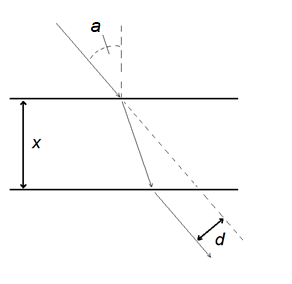

17.0314808301517

d == 1.10800800710451

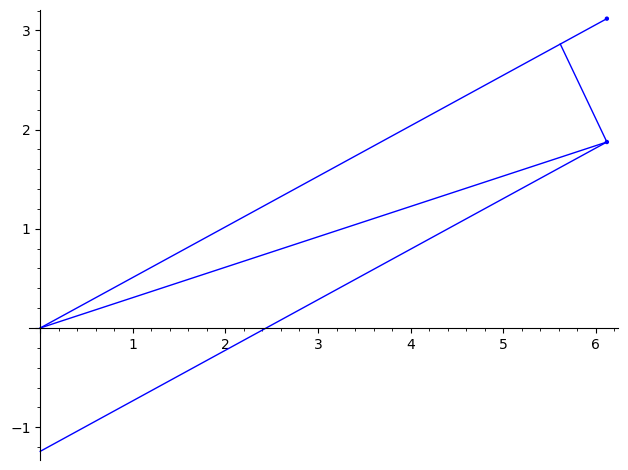

In [1]:
n = 1.55
x0 = 6.12
a = (27.0 * pi) / 180

var('x')

direction = vector([cos(a), sin(a)])
line1 = direction / direction[0] * x
# First we need to get the second angle
theta2 = asin(sin(a)/n)
show((theta2.n() * 180 / pi).n())

# Then we form a line
y0 = tan(theta2) * x0 # Start of exiting ray.
y1 = line1.subs(x=x0)[1] # If we didn't hit glass
line2 = direction / direction[0] * x - vector([0, y1-y0])

# Now we get the normal of the line
normal = vector([-direction[1], direction[0]]).normalized()

# Now we know that line2 + normal * d = line1
var('d')

lhs = d
rhs = normal * (line1 - line2)
eq = lhs == rhs.n()

show(eq)
show(point((x0, y0)) + point((x0, y1))
     + line2d([(0,0), (x0, y0)]) 
     + line2d([(0,0), (x0, y1)])
     + line2d([(0, line2.subs(x=0)[1]), (x0, line2.subs(x=x0)[1])])
     + line2d([(x0, y0), (x0 + normal[0] * eq.rhs(), y0 + normal[1] * eq.rhs())]))


# Problem 6
In the diagram below, a light ray traveling in the vertical direction enters a circular piece of glass, travels a distance L = 152 mm through the glass, and then exits the glass at the lower right. The distance from the original path of the light to a parallel line that passes through the center of the circle is d = 65.0 mm, and the total deviation of the light, i.e. the angle between the direction of the ray incident on the glass and the ray exiting the glass, is 38.0O. Find:

    (a) the radius of the circle;

    (b) the index of refraction of the glass.

 Enter your answer to Part (b) in the box below.
 
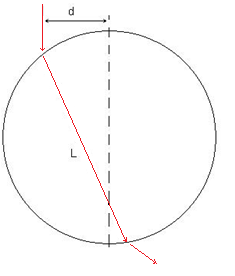

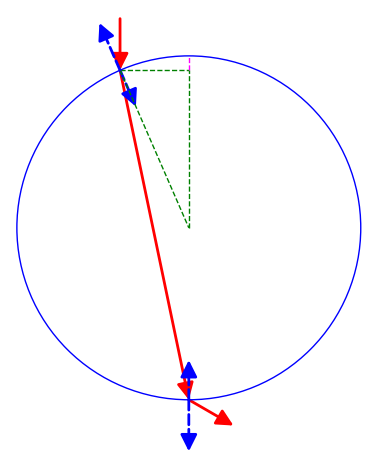

In [26]:

d = 0.4
p1 = vector((-d, sqrt(1 - d ** 2)))
p2 = vector((cos(-pi / 2), sin(-pi / 2)))
p3_direction = vector((cos(-pi / 2 + pi/3), sin(-pi / 2 + pi/3)))

diagram = circle((0, 0), 1)
diagram += arrow(p1 + vector((0, 0.3)), p1, color='red')
diagram += arrow(p1, p2, color='red')
diagram += arrow(p2, p2 + p3_direction * 0.3, color='red')
diagram += arrow(p1, p1 * 1.3, linestyle="--")
diagram += arrow(p1, p1 * (1/1.3), linestyle="--")
diagram += arrow(p2, p2 * 1.3, linestyle="--")
diagram += arrow(p2, p2 * (1/1.3), linestyle="--")
diagram += line([p1, vector((0, p1[1]))], linestyle="--", color='green')
diagram += line([p1, vector((0, 0))], linestyle="--", color='green')
diagram += line([vector((0, 0)), vector((0, p1[1]))], linestyle="--", color='green')
diagram += line([vector((0, p1[1])), vector((0, 1))], linestyle="--", color='magenta')
diagram.axes(False)

diagram.show()

In [48]:
L = 152
d = 65
delta = 38

# To start, I think here is going to be the general plan.
# We are asked to get the radius first.
# If we use the green right triangle, we can't find the radius with that alone since, it is dependent on it.
# We do know the deviation, though this doesn't tell us anything about the circle.
# What we really need is to get all of our variables into an equation.

eqs = []
def show_eqs():
    show("---")
    for eq in eqs:
        show(eq)
    show("---")

var('r d L delta n')

# First we want to find some equation for each of our unkowns, in this case r and n.

# Snells laws
var('n theta1 theta2 theta3 theta4 y')
assume(y>0)
assume(r>0)
assume(d>0)

eqs.append(solve(y == sqrt(r ** 2 - d ** 2), r)[0])
eqs.append(solve(sin(theta1) == n * sin(theta2), n)[0])

show_eqs()

# Once our eqs is equal to the number of unkowns, we can't add more.

show("We don't know y, theta1, and theta2; We need equations for these.")

# Theta1 at this point is probably the easiest.
cos_theta = cos(theta1) == d/r # Becuase of the nature of trig functions.
                               # We leave it as it is.
show(cos_theta)
show('')
show("Here we don't really have any good choices, we could turn sin into code or the other way around")
show(', but it starts to get pretty ugly. Though we really don\'t have much of a choice')
sin_theta = sqrt(1 - sin(theta1) ** 2) == cos_theta.rhs()
show(sin_theta)
sin_theta = solve(sin_theta, sin(theta1))[0]
show(sin_theta)

show('Now we subs back')
show_eqs()
eqs[1] = eqs[1].subs(sin_theta)
show_eqs()

'---'

r == sqrt(d^2 + y^2)

n == sin(theta1)/sin(theta2)

'---'

"We don't know y, theta1, and theta2; We need equations for these."

cos(theta1) == d/r

''

"Here we don't really have any good choices, we could turn sin into code or the other way around"

", but it starts to get pretty ugly. Though we really don't have much of a choice"

sqrt(-sin(theta1)^2 + 1) == d/r

sin(theta1) == -sqrt(-d^2 + r^2)/r

'Now we subs back'

'---'

r == sqrt(d^2 + y^2)

n == sin(theta1)/sin(theta2)

'---'

'---'

r == sqrt(d^2 + y^2)

n == -sqrt(-d^2 + r^2)/(r*sin(theta2))

'---'